In [1]:
import time
import numpy as np
from copy import copy
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

In [2]:
num_series = 1000
num_points = 100
snr = 0.10 # Signal to Noise Ratio

x = np.linspace(0, 4 * np.pi, num_points)

# Generate unbiased Gaussian random walks
y = np.cumsum(np.random.randn(num_series, num_points), axis=-1)

# Generate sinusoidal signals
num_signal = int(round(snr * num_series))
phi = (np.pi / 8) * np.random.randn(num_signal, 1) # small random offset

y[-num_signal:] = (
    np.sqrt(np.arange(num_points))[None, :] # random walk RMS scaling factor
    * (np.sin(x[None, :] - phi)
       + 0.05 * np.random.randn(num_signal, num_points)) # small random noise
)

In [3]:
num_fine = 800
x_fine = np.linspace(x.min(), x.max(), num_fine)
y_fine = np.empty((num_series, num_fine), dtype=float)

for i in range(num_series):
    y_fine[i, :] = np.interp(x_fine, x, y[i, :])

y_fine = y_fine.flatten()
x_fine = np.matlib.repmat(x_fine, num_series, 1).flatten()

# plot (x, y) points in 2d histogram with log colorscale
# it is pretty evident that there is some kind of structure under the noise
# can tune vmax to make signal more visible
cmap = copy(plt.cm.plasma)
cmap.set_bad(cmap(0))
h, xedges, yedges = np.histogram2d(x_fine, y_fine, bins=[400, 100])

AttributeError: module 'numpy' has no attribute 'matlib'

-0.466 sec elapsed
-0.238 sec elapsed


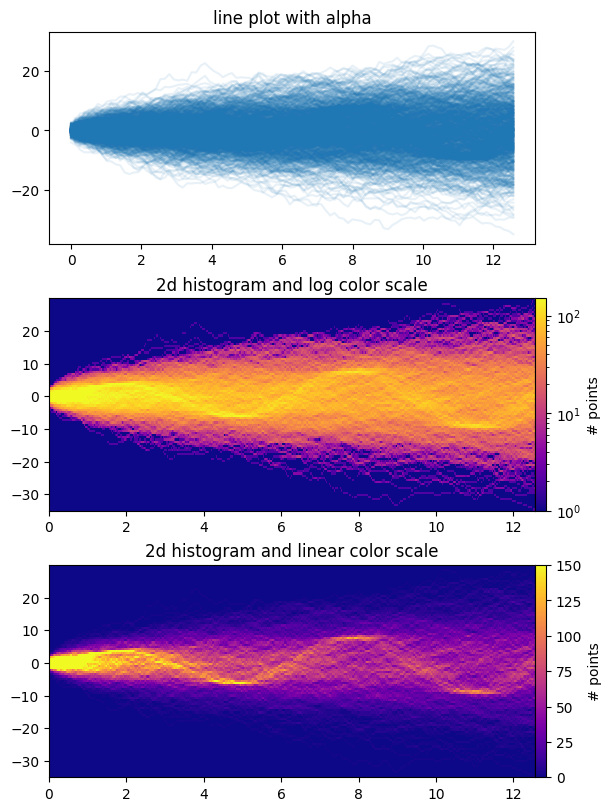

In [ ]:
fig, axs = plt.subplots(nrows=3, figsize=(6, 8), constrained_layout=True)

# plot series using `plot` and a small value of `alpha`
# with this view it is very difficult to observe the sinusoidal behavior
# because of how many overlapping series there are
# it also takes a bit of time to run because so
# many individual artists need to be generated
tic = time.time()
axs[0].plot(x, y.T, color="C0", alpha=0.1)
toc = time.time()
axs[0].set_title("line plot with alpha")
print(f"{tic-toc:.3f} sec elapsed")

# now we will convert the multiple time series into a histogram
# not only will the hidden signal be more visible,
# but it is also a much quicker procedure
tic = time.time()
pcm = axs[1].pcolormesh(
    xedges, yedges, h.T, cmap=cmap,
    norm=LogNorm(vmax=1.5e2), rasterized=True,
)

fig.colorbar(pcm, ax=axs[1], label="# points", pad=0)
axs[1].set_title("2d histogram and log color scale")

# same data but on linear color scale
pcm = axs[2].pcolormesh(xedges, yedges, h.T, cmap=cmap, vmax=1.5e2, rasterized=True)
fig.colorbar(pcm, ax=axs[2], label="# points", pad=0)
axs[2].set_title("2d histogram and linear color scale")

toc = time.time()
print(f"{tic-toc:.3f} sec elapsed")

plt.show()